# 実験Ⅳ－１　重回帰モデル

1. サンプルデータの読み込み
1. 線形重回帰の実行
1. RBF重回帰の実行



In [12]:
!pip install japanize-matplotlib
%matplotlib inline

import warnings
warnings.simplefilter('ignore') #警告を無視（コメントアウト推奨）

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib #日本語化matplotlib
sns.set(font="IPAexGothic") #日本語フォント設定


## Google Colaboratory でファイルを読み込む

以下の方法があります。

1. ファイルをアップロードする
1. URL を指定する

In [13]:
# ファイルをアップロードする
#from google.colab import files
#uploaded_file = files.upload()
#file_name = next(iter(uploaded_file))
#print(file_name)

# URLを指定する
# filename = 'https://...'

In [14]:

#観測データのファイル
filename = './data/practice01_02.csv'

#観測データ（空白区切り）の読み込み
#dataset = pd.read_csv(filename, delim_whitespace=True)
dataset = pd.read_csv(filename)
display(dataset)


,Unnamed: 0,0,25,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800
0,0.00052,0,434,442,466,478,485,490,493,496,502,509,517,525,534,542,550,559,570
1,0.00080,0,403,405,417,432,444,452,458,461,462,464,467,471,471,475,478,482,489
2,0.00100,0,378,381,378,388,411,424,431,435,438,436,438,440,443,445,448,450,453
3,0.00100,0,381,385,383,402,421,431,437,441,444,445,447,448,449,451,453,455,458
4,0.00200,0,328,331,335,338,341,344,347,351,353,356,358,360,361,363,365,367,371
5,0.00300,0,301,307,311,313,316,319,321,324,326,328,329,330,331,333,334,336,340
6,0.00500,0,274,281,286,288,290,292,294,295,297,298,299,300,301,303,304,306,308
7,0.00600,0,269,275,281,282,285,287,289,291,293,294,296,297,298,299,300,302,304
8,0.00900,0,258,262,268,269,271,273,275,276,277,278,279,280,281,282,282,283,285


## データの整形
1. 説明変数の整形（メッシュグリッド化）
1. 目的変数の抽出


In [15]:
# 放電電流[mA]
current = dataset.columns[1:].astype(float).values
# Arガス圧[Torr]
argasprs = dataset.iloc[:,0].astype(float).values

# 説明変数の設定（　メッシュグリッド
x1,x2 = np.meshgrid(current,argasprs) 
display(x1)
display(x2)

# 目的変数の設定 放電電圧[V]
y = dataset.iloc[0:,1:].astype(float).values
display(y)

# 観測点数
nSamples = y.size

array([[  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],
       [  0.,  25.,  50., 100., 150., 200., 250., 300., 350., 400., 450.,
        500., 550., 600., 650., 700., 750., 800.],


array([[0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052,
        0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052, 0.00052,
        0.00052, 0.00052, 0.00052, 0.00052],
       [0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 ,
        0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 , 0.0008 ,
        0.0008 , 0.0008 , 0.0008 , 0.0008 ],
       [0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  ],
       [0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  , 0.001  ,
        0.001  , 0.001  , 0.001  , 0.001  ],
       [0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  ,
        0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  , 0.002  ,
        0.002  , 0.002  , 0.002  , 0.002  ],
       [0.003  , 0.003  , 0.003  , 0.003  , 0.003  , 0.003  , 0.0

array([[  0., 434., 442., 466., 478., 485., 490., 493., 496., 502., 509.,
        517., 525., 534., 542., 550., 559., 570.],
       [  0., 403., 405., 417., 432., 444., 452., 458., 461., 462., 464.,
        467., 471., 471., 475., 478., 482., 489.],
       [  0., 378., 381., 378., 388., 411., 424., 431., 435., 438., 436.,
        438., 440., 443., 445., 448., 450., 453.],
       [  0., 381., 385., 383., 402., 421., 431., 437., 441., 444., 445.,
        447., 448., 449., 451., 453., 455., 458.],
       [  0., 328., 331., 335., 338., 341., 344., 347., 351., 353., 356.,
        358., 360., 361., 363., 365., 367., 371.],
       [  0., 301., 307., 311., 313., 316., 319., 321., 324., 326., 328.,
        329., 330., 331., 333., 334., 336., 340.],
       [  0., 274., 281., 286., 288., 290., 292., 294., 295., 297., 298.,
        299., 300., 301., 303., 304., 306., 308.],
       [  0., 269., 275., 281., 282., 285., 287., 289., 291., 293., 294.,
        296., 297., 298., 299., 300., 302., 304.],


## 観測データの散布図


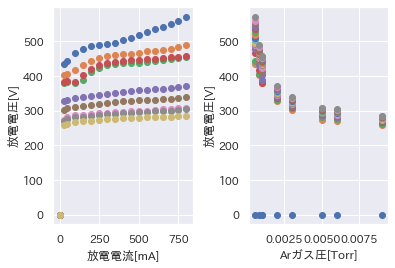

In [16]:
from mpl_toolkits import mplot3d

# 散布図の範囲情報の抽出
minx1 = np.min(x1)
maxx1 = np.max(x1)
rx1 = maxx1-minx1
cx1 = 0.5*rx1
minx2 = np.min(x2)
maxx2 = np.max(x2)
rx2 = maxx2-minx2
cx2 = 0.5*rx2

# 散布図の表示
fig, axs = plt.subplots(1, 2, figsize=(6,4))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
#
for idx in range(y.shape[0]):
    axs[0].scatter(x1[idx,:],y[idx,:])
axs[0].set_xlabel('放電電流[mA]')
axs[0].set_ylabel('放電電圧[V]')
#
for idx in range(y.shape[1]):
    axs[1].scatter(x2[:,idx],y[:,idx])
axs[1].set_xlabel('Arガス圧[Torr]')
axs[1].set_ylabel('放電電圧[V]')
#
axs[0].grid(True)
axs[1].grid(True)
plt.show()




# 三次元散布図の描画


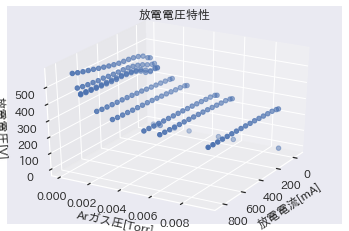

In [17]:

# 三次元散布図の表示
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x1,x2,y)
ax.set_title('放電電圧特性')
ax.set_xlabel('放電電流[mA]')
ax.set_ylabel('Arガス圧[Torr]')
ax.set_zlabel('放電電圧[V]')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()

## 線形重回帰の実行

In [18]:
from sklearn.linear_model import LinearRegression

# 線形単回帰のインスタンス生成
regm = LinearRegression()

# 線形重回帰分析
Xdata = np.concatenate([x1.reshape(-1,1), x2.reshape(-1,1)],axis=1) # データ行列生成
ydata = y.reshape(-1,1) # 列ベクトル化
regm.fit(Xdata,ydata)

LinearRegression()

β0 = 354.99 
β1 =  0.18 
β2 = -23261.61 


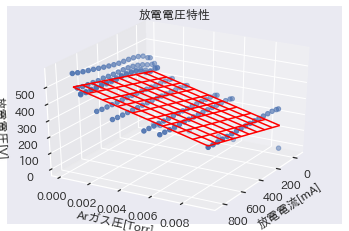

In [19]:
# 推定結果
beta0 = regm.intercept_[0]
beta1 = regm.coef_[0][0]
beta2 = regm.coef_[0][1]
print("β0 = {0:5.2f} ".format(beta0))
print("β1 = {0:5.2f} ".format(beta1))
print("β2 = {0:5.2f} ".format(beta2))

# 3次元散布図の表示
nPoints = 10
fig = plt.figure()
ax = plt.axes(projection='3d')
xfit1,xfit2 = np.meshgrid(np.linspace(minx1,maxx1,nPoints),
                          np.linspace(minx2,maxx2,nPoints))
Xfit  = np.concatenate([xfit1.reshape(-1,1),xfit2.reshape(-1,1)],axis=1)
yfit  = regm.predict(Xfit).reshape(xfit1.shape)
ax.scatter(x1,x2,y)
ax.plot_wireframe(xfit1,xfit2,yfit, color = 'red')
ax.set_title('放電電圧特性')
ax.set_xlabel('放電電流[mA]')
ax.set_ylabel('Arガス圧[Torr]')
ax.set_zlabel('放電電圧[V]')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()

## 多項式重回帰モデルの次数の選択


deg = 1: AIC = 1.91e+03 
deg = 2: AIC = 1.85e+03 
deg = 3: AIC = 1.82e+03 
deg = 4: AIC = 1.79e+03 
deg = 5: AIC = 1.77e+03 
deg = 6: AIC = 1.91e+03 
deg = 7: AIC = 1.96e+03 
deg = 8: AIC = 2.00e+03 
deg = 9: AIC = 2.03e+03 
deg = 10: AIC = 2.06e+03 


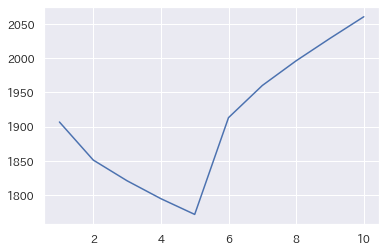

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

maxdeg = 10
deg = np.zeros(maxdeg,dtype=int)
aic = np.zeros(maxdeg)
regmp = [ [] for idx in range(maxdeg) ]
for idx in range(maxdeg):
    deg[idx] = idx+1
    # 多項式重回帰のインスタンス生成
    regmp[idx] = make_pipeline(PolynomialFeatures(degree=deg[idx],include_bias=False),
                         LinearRegression())
    # 多項式単回帰分析
    regmp[idx].fit(Xdata,ydata)

    # AIC
    ypred = regmp[idx].predict(Xdata)
    mse = mean_squared_error(y.reshape(-1,1),ypred)
    nCoefs = (deg[idx]+1)*(deg[idx]+2)/2 # (n+1)(n+2)/2
    aic[idx] = nSamples*np.log(2*np.pi*mse)+nSamples+2*(nCoefs+1)
    print("deg = {0:d}: AIC = {1:5.2e} ".format(deg[idx],aic[idx]))

# AICのプロット
fig, ax = plt.subplots()
ax.plot(deg,aic)
plt.show()


In [21]:
# 最小のAICを与える次数
degopt = deg[np.argmin(aic)]

# 多項式重回帰のインスタンス生成
regmpopt = regmp[np.argmin(aic)]

# 多項式係数の数 
nCoefsOpt = (degopt+1)*(degopt+2)/2 # (n+1)(n+2)/2

β0 = 96.63 
β0 =  6.67 
β1 = -4.93 
β2 = -0.04 
β3 = -313.54 
β4 = -0.04 
β5 =  0.00 
β6 =  0.78 
β7 = -2.58 
β8 = -0.00 
β9 = -0.00 
β10 = -0.00 
β11 = 55.72 
β12 = -0.02 
β13 = -0.00 
β14 =  0.00 
β15 =  0.00 
β16 = -0.06 
β17 =  0.80 
β18 = -0.00 
β19 = -0.00 


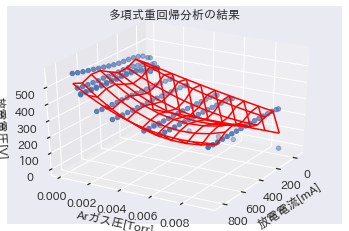

In [22]:
# 推定結果
beta0 = regmpopt[1].intercept_[0]
print("β0 = {0:5.2f} ".format(beta0))
for idx in range(0,nCoefsOpt.astype(int)-1):
    beta = regmpopt[1].coef_[0][idx]
    print("β{0:d} = {1:5.2f} ".format(idx,beta))

# 回帰曲面をプロット
fig = plt.figure()
ax = plt.axes(projection='3d')
yfit = regmpopt.predict(Xfit).reshape(xfit1.shape)
ax.scatter(x1,x2,y)
ax.plot_wireframe(xfit1,xfit2,yfit, color = 'red')
ax.set_title("多項式重回帰分析の結果")
ax.set_xlabel('放電電流[mA]')
ax.set_ylabel('Arガス圧[Torr]')
ax.set_zlabel('放電電圧[V]')
ax.set_xlim([minx1-0.1*rx1,maxx1+0.1*rx1])
ax.set_ylim([minx2-0.1*rx2,maxx2+0.1*rx2])
ax.view_init(elev=30,azim=30) # 見やすいように設定
ax.grid(True)
plt.show()